In [16]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf

# Load the Wine dataset
wine = load_wine()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [17]:
# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
clf = model.fit(X_train, y_train, epochs=20, batch_size=8, verbose=0)

In [18]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

2/2 [==============================] - 0s 2ms/step
Test accuracy: 1.0


Epoch 1/50
18/18 [==============================] - 1s 13ms/step - loss: 1.4075 - accuracy: 0.5986 - val_loss: 0.3695 - val_accuracy: 0.9167
Epoch 2/50
18/18 [==============================] - 0s 3ms/step - loss: 0.1913 - accuracy: 0.9577 - val_loss: 0.0433 - val_accuracy: 1.0000
Epoch 3/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0720 - accuracy: 0.9718 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9930 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 5/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 6/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 7/50
18/18 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 8/50
18/18 [=

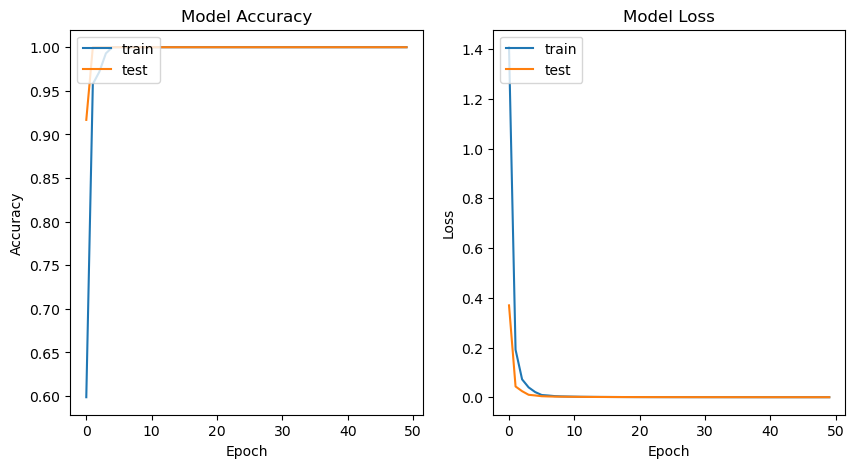

In [22]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Load the Wine dataset
wine = load_wine()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

# Standardize the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(13, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(13, activation='softmax')
])

# Compile the model with Adam optimizer
opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history of the training process
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

# Plot the training history
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the accuracy vs. iterations
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'test'], loc='upper left')

# Plot the loss vs. iterations
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'test'], loc='upper left')

plt.show()
